In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import yaml

try:
    if changed:
        raise Exception("changed")
except:
    changed = True
    sys.path.append("..")

from src.train import SparseDataset, SingleTrainer
from src.models.primal_dual import PrimalDual
from src.models.ista import ISTA

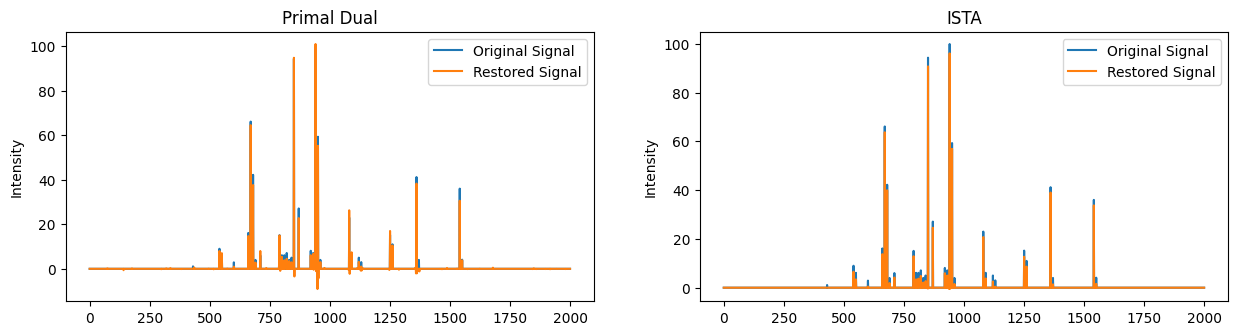

In [61]:
models = [
    "PrimalDual_best_massbank_basic_pd.pt",
    "ISTA_best_massbank_basic_ista.pt",
]

data_path = Path("../data/massbank/")
config = {"data_path": data_path, "device": "cpu"}

test_dataset = SparseDataset(config, learn_kernel=False, data_type="test")
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=len(test_dataset), shuffle=False, num_workers=0
)

np.random.seed(45)
z_batch, (x_batch, H_batch) = next(iter(test_loader))
idx = np.random.randint(0, len(test_dataset))
z_test, x_test, H_test = z_batch[idx].unsqueeze(0), x_batch[idx].unsqueeze(0), H_batch[idx].unsqueeze(0)

plot_titles = [
    "Primal Dual",
    "ISTA",
]

plt.subplots(1, 2, figsize=(15, 3.5))
for i, model_name in enumerate(models):
    model_path = "../models/" + model_name
    init_kernel = model_name.split("_")[3]
    if init_kernel == "gauss":
        init_kernel = "gaussian"
    config = yaml.load(open("../configs/experiments/" + "_".join(model_path.split("_")[2:]).replace(".pt", ".yaml")), Loader=yaml.FullLoader)
    n_layers = config["train"]["n_layers"]
    model = eval(model_name.split("_")[0])(x_test.shape[1], z_test.shape[1], n_layers=n_layers, learn_kernel=config["train"]["learn_kernel"], init_kernel=init_kernel)
    model.load_state_dict(torch.load(model_path, map_location="cpu"))
    # trainer = SingleTrainer(model, config, learn_kernel=True)
    # trainer.load_model()
    # trainer.model.eval()
    if config["train"]["learn_kernel"]:
        h = None
    else:
        h = H_test
    x_hat = model(z_test, h)
    plt.subplot(1, 2, i + 1)
    plt.plot(x_test[0], label="Original Signal")
    plt.plot(x_hat[0].detach().numpy(), label="Restored Signal")
    plt.ylabel("Intensity")
    plt.legend()
    plt.title(plot_titles[i]) 
plt.show()


In [62]:
models = [
    "PrimalDual_best_learn_h_default_fixed_pd.pt",
    "PrimalDual_best_learn_h_gauss_fixed_pd.pt",
    "ISTA_best_learn_h_default_fixed_ista.pt",
    "ISTA_best_learn_h_gauss_fixed_ista.pt",
    "ISTA_best_known_h_fixed_ista.pt",
    "PrimalDual_best_known_h_fixed_pd.pt",
]


data_path = Path("../data/massbank_fixed/")
config = {"data_path": data_path, "device": "cpu"}

test_dataset = SparseDataset(config, learn_kernel=False, data_type="test")
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=len(test_dataset), shuffle=False, num_workers=0
)

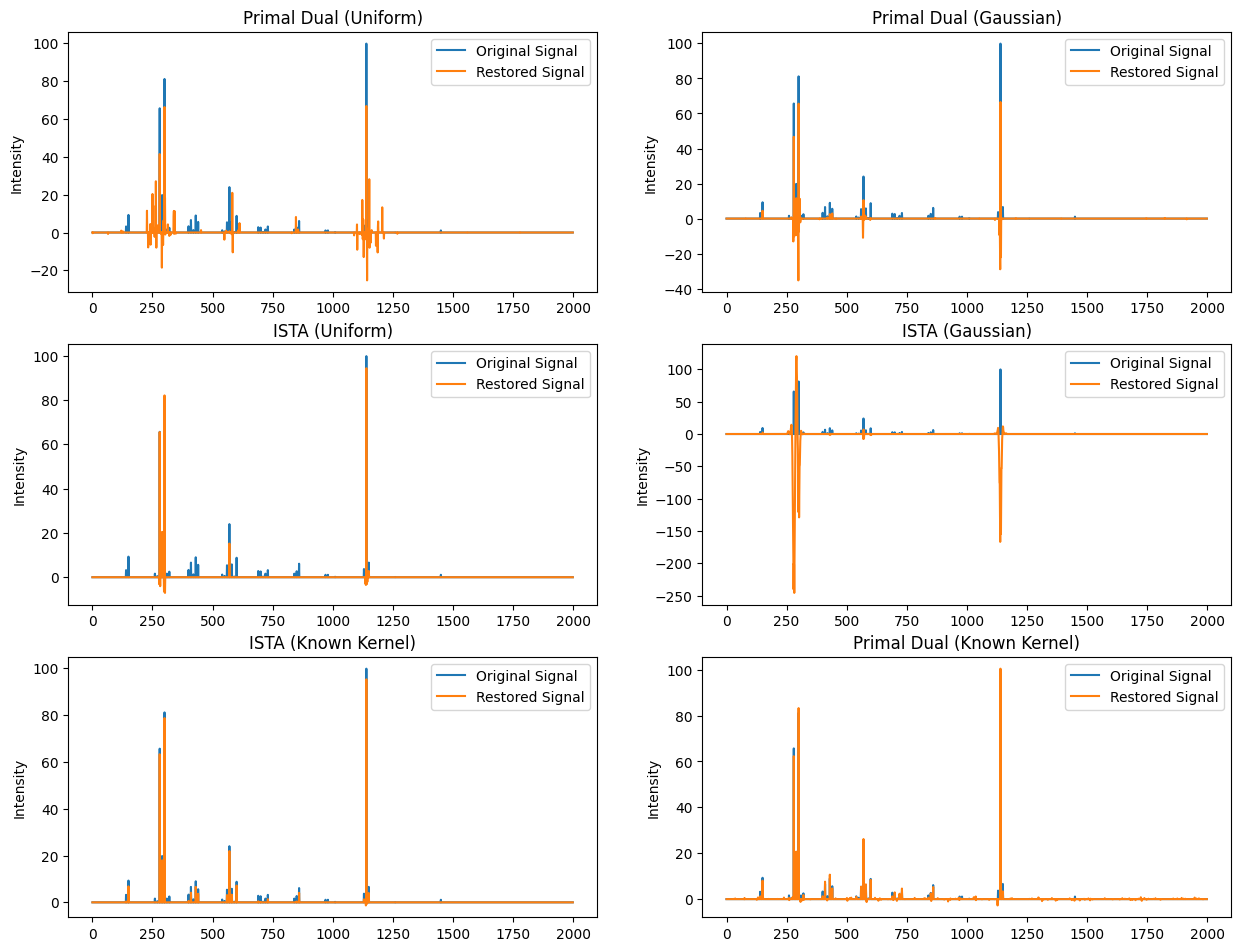

In [63]:
np.random.seed(45)
z_batch, (x_batch, H_batch) = next(iter(test_loader))
idx = np.random.randint(0, len(test_dataset))
z_test, x_test, H_test = z_batch[idx].unsqueeze(0), x_batch[idx].unsqueeze(0), H_batch[idx].unsqueeze(0)

plot_titles = [
    "Primal Dual (Uniform)",
    "Primal Dual (Gaussian)",
    "ISTA (Uniform)",
    "ISTA (Gaussian)",
    "ISTA (Known Kernel)",
    "Primal Dual (Known Kernel)",
]

plt.subplots(3, 2, figsize=(15, 11.5))
for i, model_name in enumerate(models):
    model_path = "../models/" + model_name
    init_kernel = model_name.split("_")[3]
    if init_kernel == "gauss":
        init_kernel = "gaussian"
    config = yaml.load(open("../configs/experiments/" + "_".join(model_path.split("_")[2:]).replace(".pt", ".yaml")), Loader=yaml.FullLoader)
    n_layers = config["train"]["n_layers"]
    model = eval(model_name.split("_")[0])(x_test.shape[1], z_test.shape[1], n_layers=n_layers, learn_kernel=config["train"]["learn_kernel"], init_kernel=init_kernel)
    model.load_state_dict(torch.load(model_path, map_location="cpu"))
    # trainer = SingleTrainer(model, config, learn_kernel=True)
    # trainer.load_model()
    # trainer.model.eval()
    if config["train"]["learn_kernel"]:
        h = None
    else:
        h = H_test
    x_hat = model(z_test, h)
    plt.subplot(3, 2, i + 1)
    plt.plot(x_test[0], label="Original Signal")
    plt.plot(x_hat[0].detach().numpy(), label="Restored Signal")
    plt.ylabel("Intensity")
    plt.legend()
    plt.title(plot_titles[i]) 
plt.show()
